In [2]:
import numpy as np
import matplotlib.pyplot as plt 
from PIL import Image 
import os

In [8]:
wd = os.getcwd() + '/'

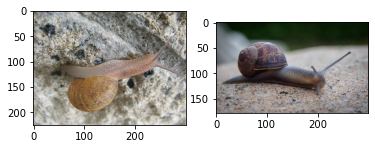

In [33]:
with Image.open(wd+'stimuli/an_size1_speed1_1.jpg') as im1:
    img1 = np.asarray(im1)
with Image.open(wd+'stimuli/an_size1_speed1_8.jpg') as im2:
    img2 = np.asarray(im2)
f,ax = plt.subplots(1,2)

for a,im in zip(ax.ravel(),[img1,img2]):
    a.imshow(im)

In [95]:
w1 = img1.shape[1]
h1 = img1.shape[0]
w2 = img2.shape[1]
h2 = img2.shape[0]

ar1 = w1/h1
ar2 = w1/h2

In [107]:
def getdiff(img_ref,img2):
    '''
    computes difference in height/width to equate aspect ratio 
    between two images 
    '''
    # get widths and heights 
    w1 = img_ref.shape[1]
    h1 = img_ref.shape[0]
    w2 = img2.shape[1]
    h2 = img2.shape[0]
    
    # get aspect ratios
    ar1 = w1/h1
    ar2 = w2/h2
    
    if ar1<ar2:
        h_new = h2
        w_new = w1*h2//h1
    elif ar1 > ar2:
        w_new = w2
        h_new = w2*h1//w1
    else:
        w_new = w2
        h_new = h2
    return w_new,h_new

In [97]:
w_new,h_new = getdiff(img1,img2)

In [98]:
print(w_new/h_new, ar1, ar2)

1.329608938547486 1.3333333333333333 1.675977653631285


In [88]:
def crop_center(img,cropw,croph):
    h,w,_ = img.shape
    startw = w//2-(cropw//2)
    starth = h//2-(croph//2)
    return img[starth:starth+croph,startw:startw+cropw,:]


def crop_same_aspect(img_ref,img2):
    '''
    crops img2 so that it has same aspect ratio as img_ref
    '''
    # get new width and height
    w_new,h_new = getdiff(img_ref,img2)
    # get centre
    return crop_center(img2,w_new,h_new)
    

In [92]:
def crop_center(img,cropw,croph):
    h,w,_ = img.shape
    startw = w//2-(cropw//2)
    starth = h//2-(croph//2)
    return img[starth:starth+croph,startw:startw+cropw,:]

In [106]:
img3 = crop_same_aspect(img1,img2)

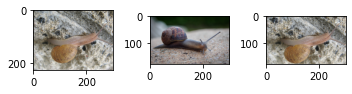

In [102]:
f,ax = plt.subplots(1,3,figsize=(5,10))
for a,im in zip(ax.ravel(),[img1,img2,img3]):
    a.imshow(im)
plt.tight_layout()

1.5